### installing keras tunner


In [1]:
!pip install keras-tuner


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"E:\Courses\Data science(ETLHive)\Deep learning\notes\CANCER.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [7]:
df.shape

(569, 31)

In [8]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [9]:
df['diagnosis'].replace({'M':1,'B':0},inplace=True)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
X = df.drop(labels=['diagnosis'],axis=1)
Y = df[['diagnosis']]

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [14]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,2.458173,...,-1.232861,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450
1,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,1.558396,...,2.173314,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838
2,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,0.954379,...,-1.295284,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894
3,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,0.074041,...,-0.829197,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497
4,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,0.950213,...,-1.085129,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [16]:
import keras_tuner as kt

In [19]:
def build_model(hp):
    
    nn=Sequential()
    
    hp_unit1=hp.Int('unit1',min_value=32,max_value=512,step=32)
    hp_unit2=hp.Int('unit2',min_value=32,max_value=512,step=32)
    hp_unit3=hp.Int('unit3',min_value=32,max_value=512,step=32)
    
    nn.add(Dense(units=hp_unit1,input_dim=xtrain.shape[1],activation='relu'))
    nn.add(Dense(units=hp_unit2,activation='relu'))
    nn.add(Dense(units=hp_unit3,activation='relu'))
    
    nn.add(Dense(units=1,activation='sigmoid'))
    
    nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return nn

In [20]:
tuner=kt.Hyperband(build_model,
                  objective='val_loss',
                  max_epochs=10,
                  directory='keras_tuner_dir',
                  project_name='keras_tuner_proj')

In [21]:
tuner.search(xtrain,ytrain,validation_split=0.2,epochs=30)

Trial 30 Complete [00h 00m 03s]
val_loss: 0.059096790850162506

Best val_loss So Far: 0.059096790850162506
Total elapsed time: 00h 00m 56s
INFO:tensorflow:Oracle triggered exit


In [22]:
hparams = tuner.get_best_hyperparameters()[0]
hparams

In [23]:
hparams.get('unit1')

128

In [24]:
hparams.get('unit2')

224

In [25]:
hparams.get('unit3')

224

In [26]:
nn = Sequential()

nn.add(Dense(128, input_dim=xtrain.shape[1],activation='relu'))
nn.add(Dense(224,activation='relu'))
nn.add(Dense(224,activation='relu'))

nn.add(Dense(1,activation='sigmoid'))

In [27]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 224)               28896     
                                                                 
 dense_6 (Dense)             (None, 224)               50400     
                                                                 
 dense_7 (Dense)             (None, 1)                 225       
                                                                 
Total params: 83,489
Trainable params: 83,489
Non-trainable params: 0
_________________________________________________________________


In [28]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [30]:
hist = nn.fit(xtrain,ytrain,
              validation_split=0.2,
              epochs=100,
              callbacks=[early_stop])

Epoch 1/100
12/12 [==============================] - 1s 13ms/step - loss: 0.3499 - accuracy: 0.8681 - val_loss: 0.1669 - val_accuracy: 0.9451
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0885 - accuracy: 0.9725 - val_loss: 0.0999 - val_accuracy: 0.9670
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0493 - accuracy: 0.9808 - val_loss: 0.1114 - val_accuracy: 0.9560
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9918 - val_loss: 0.1192 - val_accuracy: 0.9560
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9945 - val_loss: 0.1120 - val_accuracy: 0.9560
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9945 - val_loss: 0.1338 - val_accuracy: 0.9341
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.1540 - val_accuracy: 0.9341
Epoch 8/100


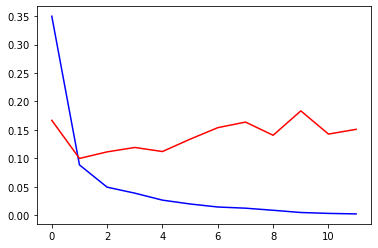

In [31]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],c='blue')
plt.plot(hist.history['val_loss'],c='red')

In [32]:
# Train data evaluation
nn.evaluate(xtrain,ytrain)

15/15 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9868


[0.03167290613055229, 0.9868131875991821]

In [33]:
# Testing data evaluation
nn.evaluate(xtest,ytest)

4/4 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9825


[0.11400728672742844, 0.9824561476707458]

In [34]:
test_prob=nn.predict(xtest)

4/4 [==============================] - 0s 1ms/step


In [35]:
test_pred=[]

for i in test_prob:
    if i>=0.5:
        test_pred.append(1)
    else:
        test_pred.append(0)

In [36]:
test_pred

[0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1]

In [37]:
# Check classification report
from sklearn.metrics import classification_report
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [38]:
nn.save('cancer_model.h5')